<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/2021.1%ED%95%99%EA%B8%B0/%EC%82%B0%EC%97%85%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0/%EC%8B%A4%EC%8A%B5/2021_05_13_PyTorch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

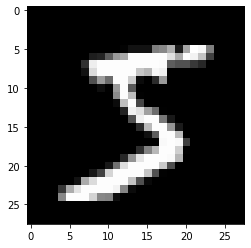

이미지 레이블:5
시작 정확도: 134/10000(1%)
에포크 0: 완료
학습중 정확도: 9531/10000(95%)
에포크 1: 완료
학습중 정확도: 9597/10000(96%)
에포크 2: 완료
학습중 정확도: 9608/10000(96%)
학습 후 정확도: 9608/10000(96%)
10번째 학습데이터의 테스트 결과: tensor([ -3.9135,  13.8202,   2.1549,  -0.9549,  -0.0763,  -0.7134,   0.9021,
          2.9868,   3.6060,   2.1252, -16.2737, -19.9442, -17.4161, -20.9105,
        -19.0856, -16.7513, -18.1900, -18.9481, -18.8291, -18.2582, -18.5333,
        -18.3111, -18.4030, -19.0297, -19.0832, -19.3192, -17.0870, -18.1154,
        -19.2884, -19.0231, -20.1388, -20.1792, -17.6618, -18.6960, -19.0472,
        -17.8772, -20.9296, -17.3651, -18.3523, -18.9609, -18.6025, -18.5867,
        -18.6424, -20.0290, -17.7393, -19.8668, -19.0866, -16.8398, -16.8853,
        -18.4581, -17.4649, -18.5810, -17.8406, -19.5368, -18.7302, -20.6840,
        -18.6492, -20.1563, -21.1285, -20.4532, -16.0589, -16.5825, -19.1095,
        -20.3921, -16.9452, -19.6356, -20.1819, -19.8196, -20.6516, -18.9785,
        -19.4728, -19.5042, -18.7411,

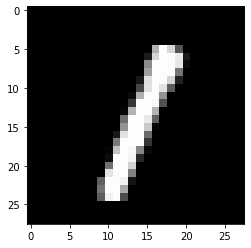

In [7]:
# -*- coding: utf-8 -*-

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data/255
y = mnist.target

import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.show()
print("이미지 레이블:{0}".format(y[0]))

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(list(map(int, y_train)))
y_test = torch.LongTensor(list(map(int, y_test)))

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))   #모델 구성
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))   #모델 구성
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 100))   #모델 구성

from torch import optim as optim
loss_fn = nn.CrossEntropyLoss() #손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
    model.train() #학습모드로 변환
    
    for data, targets in loader_train:
        optimizer.zero_grad() #그레디언트 초기화
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
    print('에포크 {0}: 완료'.format(epoch))
    
def test(head):
    model.eval() #테스트 모드로 변환
    correct = 0
    
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_num = len(loader_test.dataset)
    print('{} 정확도: {}/{}({:.0f}%)'.format(head, correct, data_num, 100.*correct/data_num))
    
test('시작')
for epoch in range(3):
    train(epoch)
    test('학습중')
test('학습 후')

index = 10 #테스트 데이터 중에서 확인해볼 데이터의 인덱스
model.eval() #모델 테스트 모드로 전환

data = X_test[index]
output = model(data) #모델 적용
print('{}번째 학습데이터의 테스트 결과: {}'.format(index, output))
_, predicted = torch.max(output.data, 0)
print('{}번째 데이터의 예측 : {}'.format(index, predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print(' 실제 레이블: {}'.format(y_test[index]))